In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [3]:
final_df = pd.read_csv('../../Data/final_csv_all_data.csv')
final_df.head()

,Entity,Code,Year,kg_per_yr_per_capita,Production_in_tons,Population (historical estimates),Life_Expectancy_years,continent
0,Afghanistan,AFG,1961,0.030559,300.0,8790140,32.96,Asia
1,Afghanistan,AFG,1962,0.030578,300.0,8969055,33.47,Asia
2,Afghanistan,AFG,1963,0.030598,300.0,9157463,33.97,Asia
3,Afghanistan,AFG,1964,0.030614,300.0,9355510,34.46,Asia
4,Afghanistan,AFG,1965,0.030627,300.0,9565154,34.95,Asia


In [4]:
protein_all = pd.read_csv('Data/all_protein_consumption_sources.csv')
protein_animal = pd.read_csv('Data/animal_protein_consumption.csv')

coastal_pop = pd.read_csv('Data/pop_within_10km_coast.csv')

In [5]:
coast = coastal_pop.melt(id_vars=['Code', 'Entity'], var_name='Year', value_name='Value')
coast['Value'] = coast['Value'].astype(float)

coast[coast['Code']=='ABW']


coast['Year'] = coast['Year'].str.replace('\D+', '')
coast['Year'] = coast['Year'].astype(int)
coast = coast.rename(columns={'Value': 'percent_pop_10km_from_coast'})
coast.head()

C:\Users\JesseNoss\AppData\Local\Temp\ipykernel_23852\2566839820.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coast['Year'] = coast['Year'].str.replace('\D+', '')


,Code,Entity,Year,percent_pop_10km_from_coast
0,ABW,Aruba,1990,100.0
1,AFG,Afghanistan,1990,0.0
2,AGO,Angola,1990,17.0
3,AIA,Anguilla,1990,100.0
4,ALB,Albania,1990,17.0


In [6]:
col_to_merge = ['Entity', 'Code', 'Year', 'fish_and_seafood_kg_protein_per_capita', 'percent_fish_total_protein_per_capita']
compiled_df = final_df.merge(protein_all[col_to_merge], on=['Entity', 'Code', 'Year'])

col_to_merge = ['Entity', 'Code', 'Year', 'percent_fish_protein_all_animal']
compiled_df = compiled_df.merge(protein_animal[col_to_merge], on=['Entity', 'Code', 'Year'])

col_to_merge = ['Entity', 'Code', 'Year', 'percent_pop_10km_from_coast']
new_compile = compiled_df.merge(coast[col_to_merge], on=['Code', 'Entity', 'Year'])


## Visualizations

In [7]:
new_compile = new_compile.rename(columns={'percent_fish_total_protein_per_capita': 'perc. total protein from fish', 'percent_fish_protein_all_animal': 'perc. animal protein from fish'})
# new_compile.head()

In [8]:
year = int(input('Select what year you want to explore: '))
year_select = new_compile.loc[new_compile['Year']==year]

In [9]:
# year_select

<AxesSubplot:ylabel='Entity'>

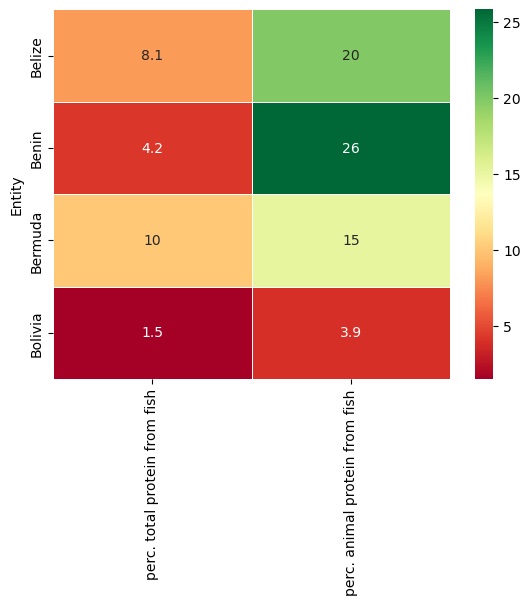

In [11]:
import seaborn as sns

first = int(input('Select first number for display range: '))
subset_test = year_select[['Entity', 'perc. total protein from fish', 'perc. animal protein from fish']].set_index('Entity')[first: (first+4)]

sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)

In [16]:
countries = list(year_select['Entity'])
countries[12]

'Barbados'

In [17]:
import random

def country_selections(text):
    
    if text == 1:
        first = 0
        subset_test = year_select[['Entity', 'perc. total protein from fish', 'perc. animal protein from fish']].set_index('Entity')[first: (first+4)]
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    elif text == 2:
        first = -5
        subset_test = year_select[['Entity', 'perc. total protein from fish', 'perc. animal protein from fish']].set_index('Entity')[first: (first+4)]
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    elif text == 3:
        selecting_countries = True
        selection = []
        i=0
        while selecting_countries:
            country = input('Country {i}: ')
            if country in countries:
                selection.append(country)
                i += 1
            elif country == '-':
                selection.append(countries[random.randint(0, len(countries))])
                i += 1
            else:
                print('Please select a valid country! It is either spelled wrong or not in our database.')

            if i >= 4:
                selecting_countries = False

        subset_ = year_select[['Entity', 'perc. total protein from fish', 'perc. animal protein from fish']]
        subset_test = subset_.loc[subset_['Entity'].isin(selection)].set_index('Entity')
        the_map = sns.heatmap(subset_test, annot=True, cmap='RdYlGn', linewidths=0.5)
    else:
        print('Error!')
        print('Please input a number from 1 to 3')
    return the_map

<AxesSubplot:ylabel='Entity'>

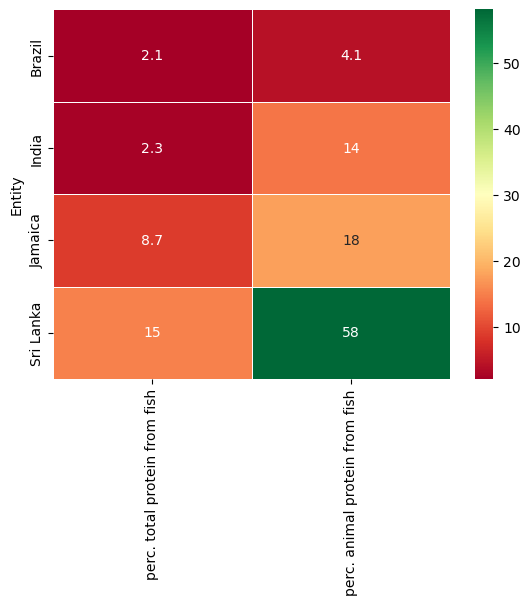

In [20]:
country_selections(int(input('Would you like to view the (1) first 4 countries, (2) last 4 countries, or (3) select 4 to compare? Input 1, 2, or 3: ')))


In [71]:
subset_test.style.background_gradient(cmap='Greens')

,perc. total protein from fish,perc. animal protein from fish
Entity,,
Myanmar,17.582680,45.267995
Namibia,6.130721,16.735824
Nepal,0.957396,6.659268
Netherlands,7.008086,10.494085
